[타이타닉호 승선인원 목록 데이터 분석 및 시각화]
    - 자료: '../DATA/titanic.csv'
            './utils.py'
1. 데이터 분석 방법 : 확증적 분석.
2. 목적: 가설검증
        1. 아메리칸 드림을 꿈꾸며 탄 독신 남성이 정말로 많았는가?
            1-1. 독신 남성의 사망률은 얼마나 되는가?
            
        2. 여성과 어린이의 생존율은 실제로 높았는가? 
            2-1 그렇지 않았다면 이유가 무엇일까?
        
3. 목표 데이터: survived
4. feature/attribute : 나머지 모두.


[1] 모듈 로딩 및 데이터 준비 <hr>

In [52]:
## [1-1] 모듈 로딩 
import pandas as pd                     # 데이터 분석 및 전처리용 모듈
import numpy as np                      # 배열(array)을 지원하는 파이썬 패키지

import matplotlib.pyplot as plt         # 데이터 시각화 즉, 그래프 관련 모듈 
import utils                            # 데이터확인용 

In [53]:
## [1-2] 데이터 준비
D_FILE = '../DATA/titanic.csv'
data1 = pd.read_csv(D_FILE)
ttDF = pd.DataFrame(data1)


[2] 데이터 확인<hr>

In [54]:
ttDF.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [55]:
ttDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [56]:
utils.printUniqueValue(ttDF)


[survived컬럼의 고유값]=====
갯수 :  2
[0 1]
survived
0    549
1    342
Name: count, dtype: int64

[pclass컬럼의 고유값]=====
갯수 :  3
[3 1 2]
pclass
3    491
1    216
2    184
Name: count, dtype: int64

[sex컬럼의 고유값]=====
갯수 :  2
['male' 'female']
sex
male      577
female    314
Name: count, dtype: int64

[age컬럼의 고유값]=====
갯수 :  88
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Le

In [57]:
# ttDF.isna().sum()
# deck 는 688/891 이 nan이므로 데이터의 가치가 없음.
ttDF = ttDF.drop(columns='deck').copy()

In [58]:
ttDF[ttDF['age'].isna()]

# 'age'에도 NaN이 많지만, 비율이 상대적으로 적으므로 보류.
# 처리하기 편하도록 nan상태를 유지


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,Southampton,no,True


In [59]:
ttDF.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

[3] 데이터 분석 <hr>

In [60]:
tsDF = ttDF[ttDF['survived']==1]
utils.printUniqueValue(tsDF)
# print(ttDF['survived'].value_counts())


[survived컬럼의 고유값]=====
갯수 :  1
[1]
survived
1    342
Name: count, dtype: int64

[pclass컬럼의 고유값]=====
갯수 :  3
[1 3 2]
pclass
1    136
3    119
2     87
Name: count, dtype: int64

[sex컬럼의 고유값]=====
갯수 :  2
['female' 'male']
sex
female    233
male      109
Name: count, dtype: int64

[age컬럼의 고유값]=====
갯수 :  65
[38.   26.   35.   27.   14.    4.   58.   55.     nan 34.   15.   28.
  3.   19.   49.   29.   21.    5.   17.   32.    0.83 30.   33.   23.
 32.5  12.   24.   22.   16.   40.    9.    1.   45.   44.   18.   31.
  8.   37.   50.   25.   41.   63.   42.    0.92 36.    2.   60.   39.
 13.   52.   48.    0.75 54.    7.   62.   53.   20.   80.   56.    6.
  0.67 51.   43.   11.    0.42 47.  ]
age
24.00    15
36.00    11
35.00    11
27.00    11
22.00    11
         ..
55.00     1
32.50     1
12.00     1
0.92      1
47.00     1
Name: count, Length: 65, dtype: int64

[sibsp컬럼의 고유값]=====
갯수 :  5
[1 0 4 3 2]
sibsp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64

[parc

In [61]:
# survived/alive 기준으로 정렬
# 생존률과 상관 계수가 높은 컬럼 찾기
# 생존자 342명.
# 객실등급 1 : 136, 3: 119, 2: 87
# 성별 여성 : 233, 남성 109명
# 연령 : 다양함 - 카테고리
# 동승자/형제/배우자 0: 210, 1: 112, 2:13, 3:4, 4:3
# 동승자/부모/자녀 0: 233, 1: 65, 2:40, 3:3, 5:1
# 요금 다양함. - 카테고리로 간주해야할듯.
# 탑승항 : Southamton: 217, Cherbourg: 93, Queenstown: 30
# who : woman 205, man 88, child 49
# 성인남성 여부 : False 254, True 88
# alone True 163, False 179

In [62]:
tdDF = ttDF[ttDF['survived']==0]
utils.printUniqueValue(tdDF)


[survived컬럼의 고유값]=====
갯수 :  1
[0]
survived
0    549
Name: count, dtype: int64

[pclass컬럼의 고유값]=====
갯수 :  3
[3 1 2]
pclass
3    372
2     97
1     80
Name: count, dtype: int64

[sex컬럼의 고유값]=====
갯수 :  2
['male' 'female']
sex
male      468
female     81
Name: count, dtype: int64

[age컬럼의 고유값]=====
갯수 :  77
[22.  35.   nan 54.   2.  20.  39.  14.  31.   8.  19.  40.  66.  28.
 42.  21.  18.  27.   7.  65.  28.5 11.  45.   4.  26.  32.  16.  25.
 24.  29.  46.  59.  71.  34.  33.  37.  38.  47.  14.5 17.  70.5 32.5
 23.   9.  36.5 51.  55.5 40.5 30.  44.   1.  61.  56.  50.  36.  45.5
 20.5 62.  41.  52.  23.5 43.  15.   3.  10.  64.  48.  58.  55.  49.
 57.  70.  24.5 60.  30.5  6.  34.5 74. ]
age
21.0    19
28.0    18
25.0    17
18.0    17
22.0    16
        ..
15.0     1
36.5     1
23.5     1
55.5     1
74.0     1
Name: count, Length: 77, dtype: int64

[sibsp컬럼의 고유값]=====
갯수 :  7
[1 0 3 4 2 5 8]
sibsp
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: count, dtype: 

In [63]:
##사망자: 549
## 객실등급 : 3:372, 2:97, 1:80
## 성별 : 남자: 468, 여자: 81
## 탑승항 : Southamton: 427, Cherbourg: 75, Queenstown: 47
## who : man: 449, woman: 66, child: 34
## 성인남성 : True: 449, False: 100
## alone: True: 374, False: 175



[3] 데이터 분석

가설1. 실제 독신 남성 수가 많았는가?

In [64]:
# 21세 기준이므로
# 21세 미만, 21~30, 31~40, 41~50, 51~60, 그이상 으로 하여 6가지분류로 그룹화
bins = [0, 21, 30, 40, 50, 60, float('inf')]
labels = ['21under', '20대', '30대', '40대', '50대', '60over']
ttDF['age_group'] = pd.cut(ttDF['age'], bins=bins, labels=labels, right=False)

# 위에서는 범위로 지정하였기 때문에 nan 값만을 따로 지정할수 없음
# 따로 범주를 추가하고, 데이터에도 별개로 처리
ordered_labels = ['missing', '21under', '20대', '30대', '40대', '50대', '60over']
ttDF['age_group'] = pd.Categorical(ttDF['age_group'], categories=ordered_labels, ordered=True)


ttDF['age_group'] = ttDF['age_group'].fillna('missing')
ttDF['age_group'].isna().sum()

0

In [65]:
# 조건
# 성인 남성 & 단독승객 == 410 명.
# class Third     263/  First      75 / Second     72
# 나이 미상인 인덱스 수 107
# 나이 최소값 16 / 최대값 80


ttDFama = ttDF[(ttDF['adult_male'] == True) & (ttDF['alone'] == True)]
ttDFama['class'].value_counts()
ttDFama['age'].isna().sum()
ttDFama['age'].min()
ttDFama['age'].max()
# 16세 데이터가 포함됨을 확인 
# 조사해보니 21세가 기준임을 확인.
# 21세 미만이며 성인남성으로 분류된 경우가 63건.
# age 분류의 정리가 필요.
ttDF[(ttDF['age'] < 21) & (ttDF['adult_male']==True)].count()  # 63
# ttDF[(ttDF['age'] < 21)].count()      # 180

ttDFama['age_group'].isna().sum()

0

In [66]:
ttDF[(ttDF['adult_male'] == True) & (ttDF['alone'] == True)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,30대
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True,missing
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True,50대
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,21under
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,Southampton,yes,True,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,Southampton,no,True,20대
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,no,True,20대
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,20대
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,20대


In [67]:
ttDF[(ttDF['adult_male'] == False) & (ttDF['alive'] == 'no')& (ttDF['pclass'] == 1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,Cherbourg,no,True,50대
297,0,1,female,2.0,1,2,151.5500,S,First,child,False,Southampton,no,False,21under
498,0,1,female,25.0,1,2,151.5500,S,First,woman,False,Southampton,no,False,20대


In [68]:
#age_group에 따라 adult_male 값을 새로 설정.
# ttDF.loc[(ttDF['age_group'] == '21under') & (ttDF['sex'] == 'female')]['adult_male'] = False
# ttDF.loc[(ttDF['age_group'] == '21under') ].count() ,ttDF[(ttDF['age'] < 21)].count() 

In [69]:
# ttDF.loc[(ttDF['age_group'] == '21under') & (ttDF['adult_male'] == True)]['adult_male']=False
# 슬라이스로 생성된 데이터프레임에 데이터를 덮어씌우는 꼴
# SettingWithCopyWarning: 오류발생

ttDF.loc[(ttDF['age_group'] == '21under') & (ttDF['sex'] == 'female'), 'adult_male'] = False

In [70]:
ttDF.loc[(ttDF['age_group'] == '21under') ].count() ,ttDF[(ttDF['age'] < 21)].count() 

(survived       180
 pclass         180
 sex            180
 age            180
 sibsp          180
 parch          180
 fare           180
 embarked       180
 class          180
 who            180
 adult_male     180
 embark_town    180
 alive          180
 alone          180
 age_group      180
 dtype: int64,
 survived       180
 pclass         180
 sex            180
 age            180
 sibsp          180
 parch          180
 fare           180
 embarked       180
 class          180
 who            180
 adult_male     180
 embark_town    180
 alive          180
 alone          180
 age_group      180
 dtype: int64)

In [71]:
ttDF.loc[(ttDF['age_group'] == '21under') | (ttDF['age'] < 21)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False,21under
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False,21under
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,Southampton,yes,False,21under
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,21under
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,Southampton,no,True,21under
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,1,3,male,4.0,1,1,11.1333,S,Third,child,False,Southampton,yes,False,21under
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,Cherbourg,yes,True,21under
876,0,3,male,20.0,0,0,9.8458,S,Third,man,True,Southampton,no,True,21under
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,Southampton,no,True,21under


In [72]:
# ttDF[ttDF['alone']==True] / 537

# 단독승객이며 성인 319 / 여성 77
#ttDF[(ttDF['alone']==True)&(ttDF['age']>21)]

# 단독승객이며 남자 성인 242 
#ttDF[(ttDF['alone']==True)&(ttDF['age']>21)&(ttDF['sex']=='male')]

# class Third     135/First      54/Second     53
ttDF[(ttDF['alone']==True)&(ttDF['age']>21)&(ttDF['sex']=='male')]['class'].value_counts()

class
Third     135
First      54
Second     53
Name: count, dtype: int64

전체 891중, 단독으로 탑승한 남자 성인은 242명



In [73]:
ttDF.loc[ttDF['pclass']==3, 'fare'].min()  # 0
# ttDF.loc[ttDF['pclass']==3, 'fare'].max()  # 69.55
# 3등급 객실의 fare 0 ~ 69.55

# ttDF.loc[ttDF['pclass']==2, 'fare'].min()  # 0
# ttDF.loc[ttDF['pclass']==2, 'fare'].max()  # 73.5
# 2등급 객실의 fare 0 ~ 73.5

# ttDF.loc[ttDF['pclass']==1, 'fare'].min()  # 0
# ttDF.loc[ttDF['pclass']==1, 'fare'].max()  # 512.3292
# 1등급 객실의 fare 0 ~ 512.3292


0.0

각각 최저값이 0임. why?

In [74]:
ttDF

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,20대
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,30대
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,20대
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,30대
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,30대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,20대
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,21under
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False,missing
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,20대


In [75]:
# ttDF.loc[(ttDF['pclass']==1) & (ttDF['fare']==0), 'age']
# age로는 이유를 파악할 수 없음.

ttDF.loc[(ttDF['pclass']==3) & (ttDF['fare']==0), 'sibsp']
# 'sibsp' 은 1,2,3 모두 0임.
ttDF.loc[(ttDF['pclass']==3) & (ttDF['fare']==0), 'embarked']
# 'alone' 은 1,2,3 모두 True임. why? 
# 'sex' 모두 male
# 'embarked' 는 모두 Southampton
# 자료의 오류인가? 
ttDF.loc[(ttDF['fare']==0),'alive']
# ttDF.loc[(ttDF['fare']==0)].count()
# 탑승비용이 0원인 자는, 15명이며 전원 사우스햄튼에서 탑승한 남성이며 동승자가 없다.
# 1명만 살아남았다.

179     no
263     no
271    yes
277     no
302     no
413     no
466     no
481     no
597     no
633     no
674     no
732     no
806     no
815     no
822     no
Name: alive, dtype: object

가설1. 성인 남성 단독승선은전체 891명 중 242명으로 27퍼센트로 높은 수치를 보이고있다.

In [76]:
ttDFama['age_group']

4          30대
5      missing
6          50대
12     21under
17     missing
        ...   
883        20대
884        20대
886        20대
889        20대
890        30대
Name: age_group, Length: 410, dtype: category
Categories (7, object): ['missing' < '21under' < '20대' < '30대' < '40대' < '50대' < '60over']

(2,)


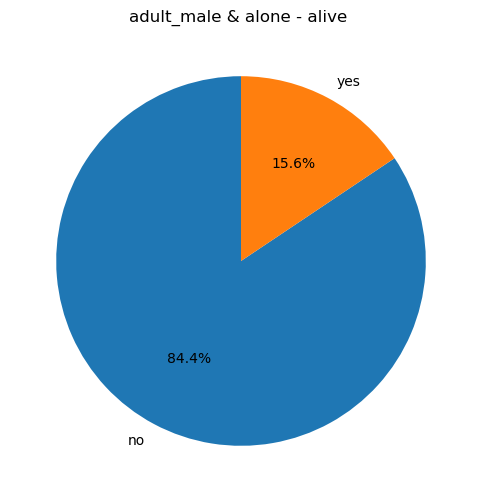

In [77]:
#성인 남성, 단독 총 410
# 탑승항별
plt.figure(figsize=(12,6))
agg_count=ttDFama['alive'].value_counts()
# xData = agg_count.index
yData2 = agg_count.values
print(yData2.shape)

plt.pie(yData2, labels=agg_count.index, autopct='%1.1f%%', startangle=90)

plt.title( 'adult_male & alone - alive ')

plt.show()

In [78]:
agg_count.values
ttDFama['age_group'].isna().sum()

0

(6,) (6,)


C:\Users\kdt\AppData\Local\Temp\ipykernel_32204\440761556.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttDFama['age_group'] = pd.Categorical(ttDFama['age_group'], categories=labels, ordered=True)
c:\Users\kdt\anaconda3\envs\PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


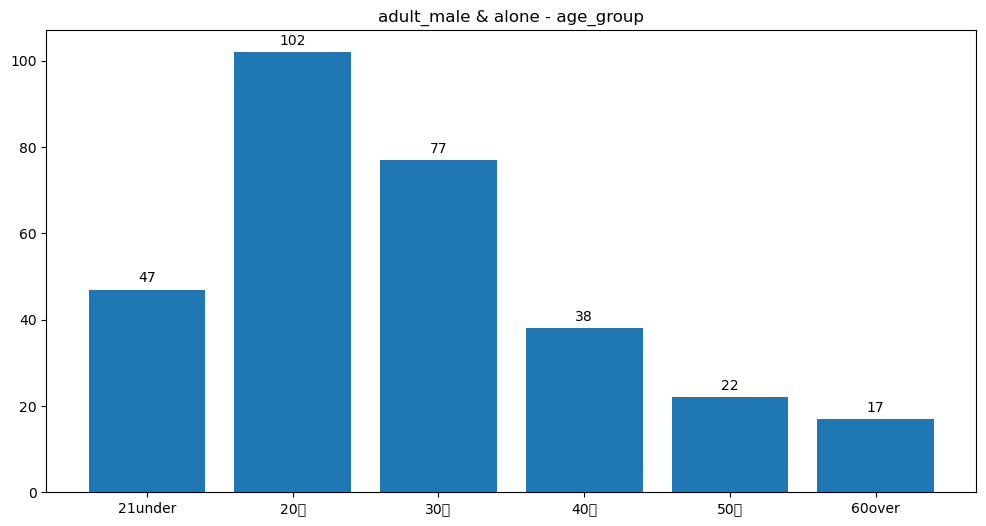

In [79]:
# [3-1] 시각화
#성인 남성, 단독 총 410
#연령대별 분포.
plt.figure(figsize=(12,6))
ttDFama['age_group'] = pd.Categorical(ttDFama['age_group'], categories=labels, ordered=True)
agg_count=ttDFama['age_group'].value_counts()
agg_count = agg_count.reindex(labels, fill_value=0)
xData = agg_count.index
yData1 = ''
yData2 = agg_count.values
print(xData.shape, yData2.shape)
# print(ttDFama['age_group'].dtype)

for i in range(len(xData)):
    plt.text(xData[i], yData2[i] + 1, str(yData2[i]), ha='center', va='bottom')

plt.title( 'adult_male & alone - age_group')
plt.bar(xData,yData2)
plt.show()

In [80]:
ttDFamay = ttDFama.loc[(ttDFama['alive']=='yes'),'age_group']
ttDFaman = ttDFama.loc[(ttDFama['alive']=='no'),'age_group']

(6,) (6,) (6,)


c:\Users\kdt\anaconda3\envs\PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


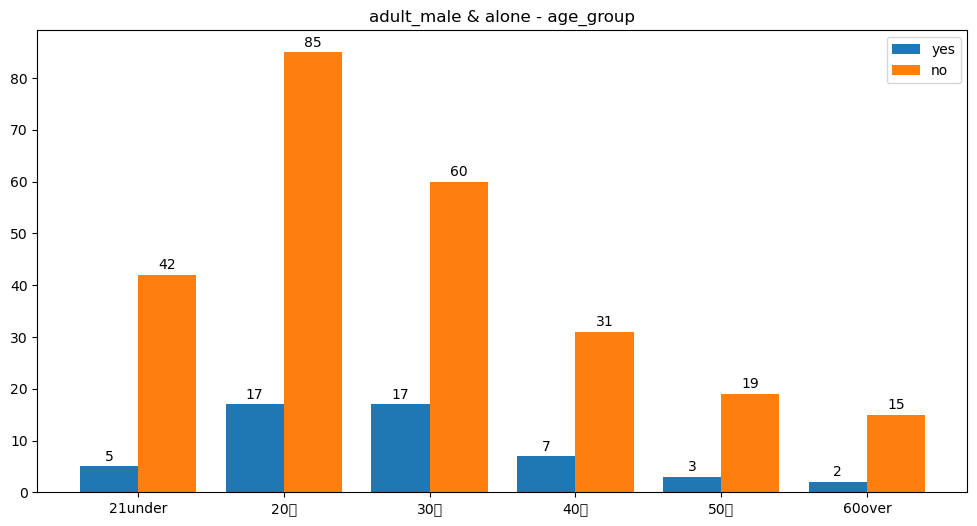

In [81]:
# [3-1] 시각화
#성인 남성, 단독 총 410
#연령대별 분포.

plt.figure(figsize=(12,6))
ttDFamay = pd.Categorical(ttDFamay, categories=labels, ordered=True)
agg_count1 = ttDFamay.value_counts()
agg_count1 = agg_count1.reindex(labels, fill_value=0)

ttDFaman = pd.Categorical(ttDFaman, categories=labels, ordered=True)
agg_count2 = ttDFaman.value_counts()
agg_count2 = agg_count2.reindex(labels, fill_value=0)

xData1 = agg_count1.index
xData2 = agg_count2.index
yData1 = agg_count1.values
yData2 = agg_count2.values
print(xData1.shape,yData1.shape, yData2.shape)
# print(ttDFama['age_group'].dtype)
width=0.2
xData1_num = np.arange(len(xData1))
plt.bar(xData1_num-width,yData1, width=0.4, label='yes')
plt.bar(xData1_num+width,yData2, width=0.4, label='no')


for i in range(len(xData1)):
    plt.text(xData1_num[i]-width, yData1[i] + 0.5, str(yData1[i]), ha='center', va='bottom')
for i in range(len(xData1)):
    plt.text(xData1_num[i]+width, yData2[i] + 0.5, str(yData2[i]), ha='center', va='bottom')
plt.xticks(xData1_num, xData1)
plt.title( 'adult_male & alone - age_group')
plt.legend()
plt.show()

(6,) (6,) (6,)


c:\Users\kdt\anaconda3\envs\PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


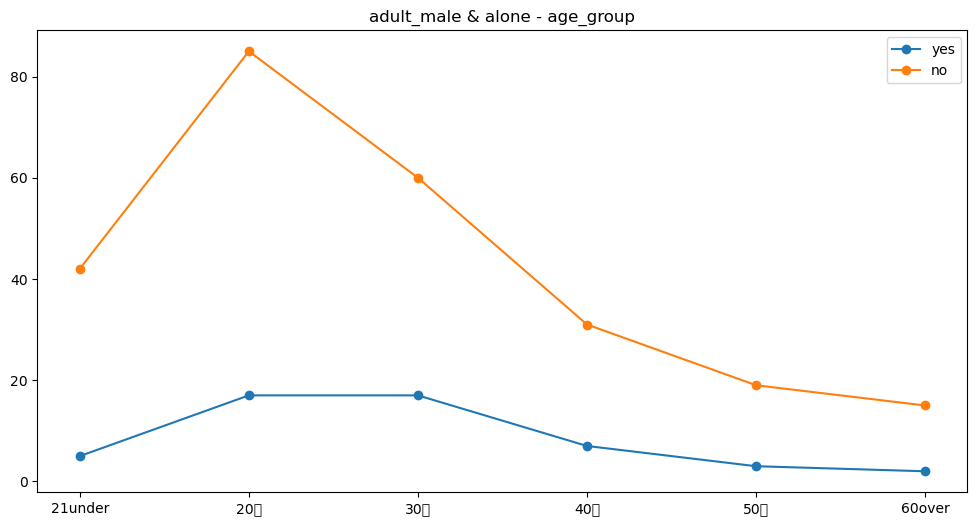

In [82]:
# [3-1] 시각화
#성인 남성, 단독 총 410
#연령대별 분포.

plt.figure(figsize=(12,6))
ttDFamay = pd.Categorical(ttDFamay, categories=labels, ordered=True)
agg_count1 = ttDFamay.value_counts()
agg_count1 = agg_count1.reindex(labels, fill_value=0)

ttDFaman = pd.Categorical(ttDFaman, categories=labels, ordered=True)
agg_count2 = ttDFaman.value_counts()
agg_count2 = agg_count2.reindex(labels, fill_value=0)

xData1 = agg_count1.index
xData2 = agg_count2.index
yData1 = agg_count1.values
yData2 = agg_count2.values
print(xData1.shape,yData1.shape, yData2.shape)
# print(ttDFama['age_group'].dtype)


plt.plot(xData1,yData1, 'o-', label='yes')
plt.plot(xData1,yData2, 'o-', label='no')


# for i in range(len(xData1)):
#     plt.text(xData1_num[i]-width, yData1[i] + 0.5, str(yData1[i]), ha='center', va='bottom')
# for i in range(len(xData1)):
#     plt.text(xData1_num[i]+width, yData2[i] + 0.5, str(yData2[i]), ha='center', va='bottom')
plt.xticks(xData1)
plt.title( 'adult_male & alone - age_group')
plt.legend()
plt.show()

In [83]:
ttDFama['embark_town'].value_counts()

embark_town
Southampton    321
Cherbourg       59
Queenstown      30
Name: count, dtype: int64

(3,) (3,)


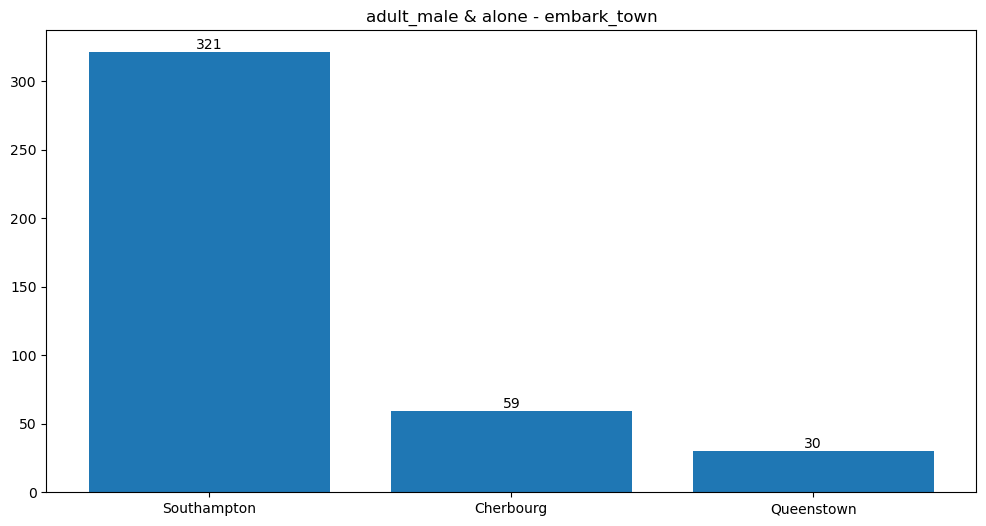

In [84]:
#성인 남성, 단독 총 410
# 탑승항별
plt.figure(figsize=(12,6))
agg_count=ttDFama['embark_town'].value_counts()
xData = agg_count.index
yData2 = agg_count.values
print(xData.shape, yData2.shape)

# print(ttDFama['embark_town'].dtype)

for i in range(len(xData)):
    plt.text(xData[i], yData2[i], str(yData2[i]), ha='center', va='bottom')

plt.title('adult_male & alone - embark_town')
plt.bar(xData,yData2)
plt.show()

(3,) (3,)


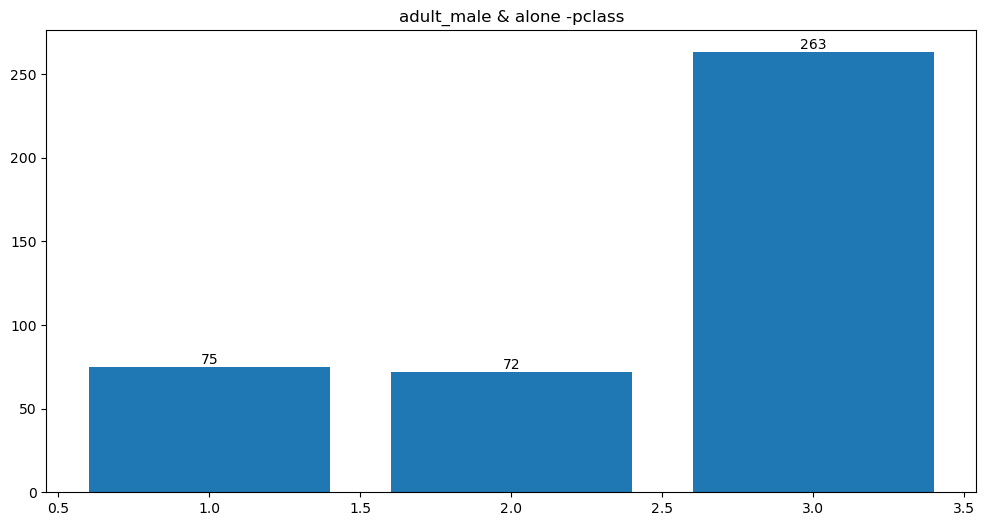

In [85]:
#성인 남성, 단독 총 410
# 탑승항별
plt.figure(figsize=(12,6))
agg_count=ttDFama['pclass'].value_counts()
xData = agg_count.index
yData2 = agg_count.values
print(xData.shape, yData2.shape)

# print(ttDFama['pclass'].dtype)

for i in range(len(xData)):
    plt.text(xData[i], yData2[i], str(yData2[i]), ha='center', va='bottom')

plt.title('adult_male & alone -pclass')
plt.bar(xData,yData2)
plt.show()

(3,) (3,)


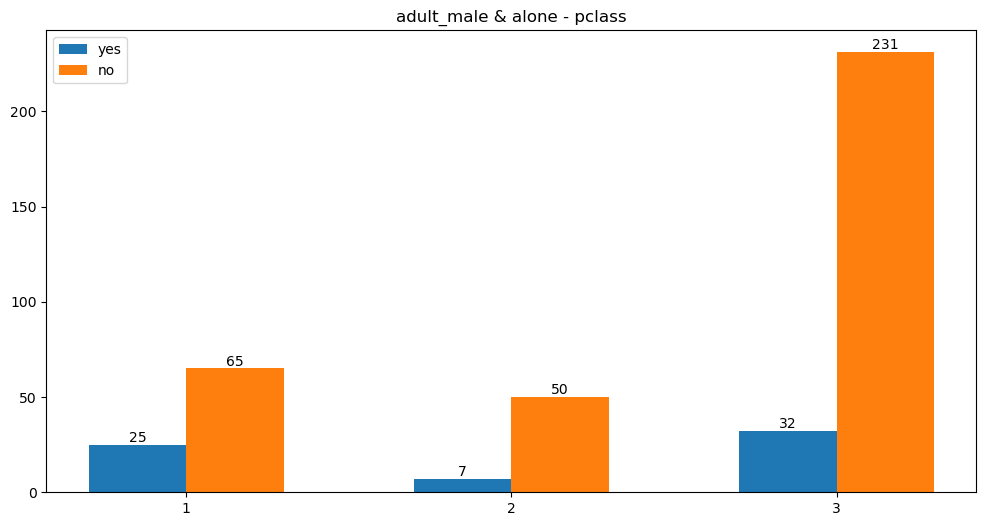

In [86]:
#성인 남성, 단독 총 410
# 탑승항별
plt.figure(figsize=(12,6))
agg_count1=ttDFama.loc[(ttDFama['alive']=='yes'),'pclass'].value_counts()
agg_count2=ttDFama.loc[(ttDFama['alive']=='no'),'pclass'].value_counts()

xData = agg_count1.index
yData1 = agg_count1.values
yData2 = agg_count2.values
print(xData.shape, yData2.shape)

width = 0.15
plt.bar(xData-width,yData1, width=0.3, label='yes')
plt.bar(xData+width,yData2, width=0.3, label='no')
# print(ttDFama['pclass'].dtype)

for i in range(len(xData)):
    plt.text(xData[i]-width, yData1[i], str(yData1[i]), ha='center', va='bottom')
    plt.text(xData[i]+width, yData2[i], str(yData2[i]), ha='center', va='bottom')
plt.legend()
plt.title('adult_male & alone - pclass')
plt.xticks(agg_count1.index)
plt.show()

In [87]:
ttDFnama = ttDF.loc[(ttDF['alone']==False) | (ttDF['adult_male']==False)]

(2,)


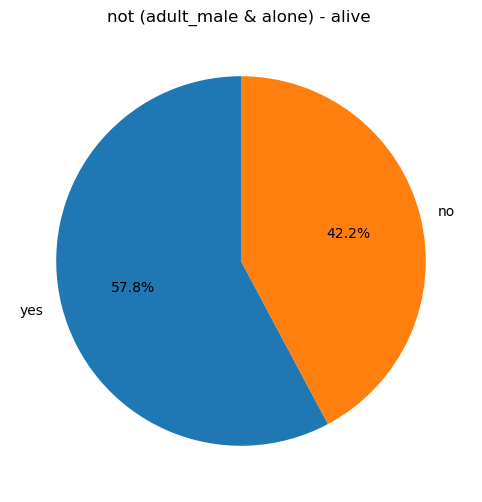

In [88]:
#성인 남성, 단독 총 410
# 탑승항별
plt.figure(figsize=(12,6))
agg_count=ttDFnama['alive'].value_counts()
# xData = agg_count.index
yData2 = agg_count.values
print(yData2.shape)

plt.pie(yData2, labels=agg_count.index, autopct='%1.1f%%', startangle=90)

plt.title( 'not (adult_male & alone) - alive ')

plt.show()

(6,) (6,) (6,)


c:\Users\kdt\anaconda3\envs\PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


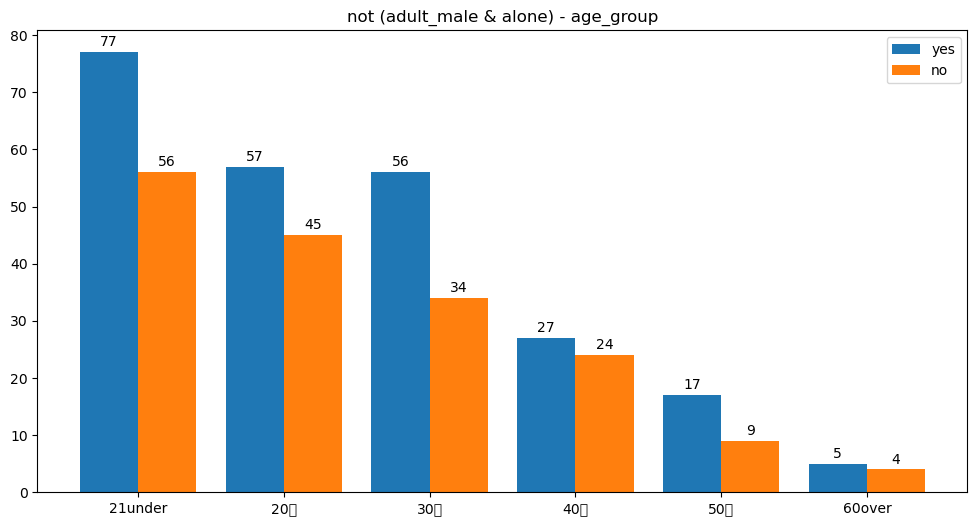

In [89]:
ttDFnamay = ttDFnama.loc[(ttDFnama['alive']=='yes'),'age_group']
ttDFnaman = ttDFnama.loc[(ttDFnama['alive']=='no'),'age_group']


plt.figure(figsize=(12,6))
ttDFnamay = pd.Categorical(ttDFnamay, categories=labels, ordered=True)
agg_count1 = ttDFnamay.value_counts()
agg_count1 = agg_count1.reindex(labels, fill_value=0)

ttDFnaman = pd.Categorical(ttDFnaman, categories=labels, ordered=True)
agg_count2 = ttDFnaman.value_counts()
agg_count2 = agg_count2.reindex(labels, fill_value=0)

xData1 = agg_count1.index
xData2 = agg_count2.index
yData1 = agg_count1.values
yData2 = agg_count2.values
print(xData1.shape,yData1.shape, yData2.shape)
# print(ttDFama['age_group'].dtype)
width=0.2
xData1_num = np.arange(len(xData1))
plt.bar(xData1_num-width,yData1, width=0.4, label='yes')
plt.bar(xData1_num+width,yData2, width=0.4, label='no')


for i in range(len(xData1)):
    plt.text(xData1_num[i]-width, yData1[i] + 0.5, str(yData1[i]), ha='center', va='bottom')
for i in range(len(xData1)):
    plt.text(xData1_num[i]+width, yData2[i] + 0.5, str(yData2[i]), ha='center', va='bottom')
plt.xticks(xData1_num, xData1)
plt.title( 'not (adult_male & alone) - age_group')
plt.legend()
plt.show()

In [90]:
# ttDFnama.loc[(ttDFnama['alive']=='yes'),'pclass'].value_counts()
ttDFnama.loc[(ttDFnama['alive']=='no'),'pclass'].value_counts()

pclass
3    141
2     32
1     30
Name: count, dtype: int64

(3,) (3,)


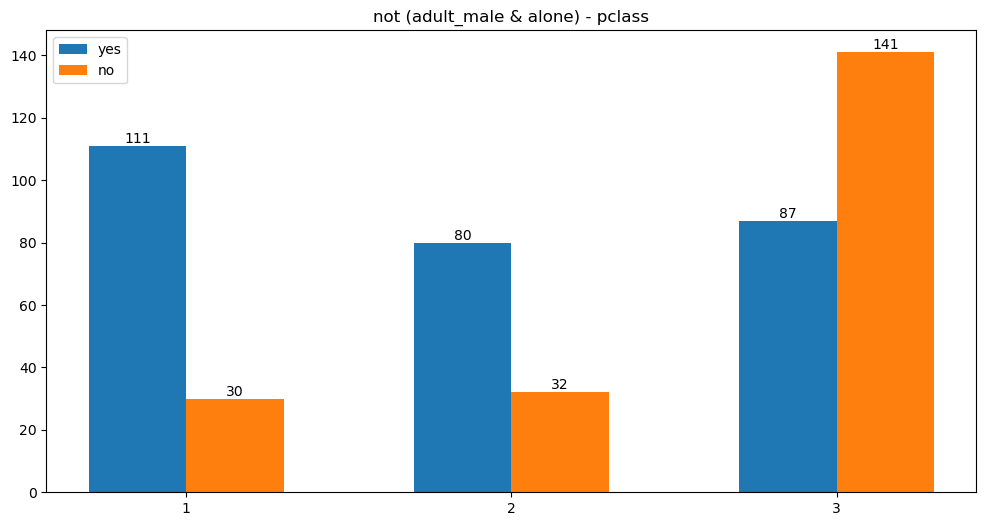

In [91]:

plt.figure(figsize=(12,6))
agg_count1=ttDFnama.loc[(ttDFnama['alive']=='yes'),'pclass'].value_counts()
agg_count2=ttDFnama.loc[(ttDFnama['alive']=='no'),'pclass'].value_counts()

xData = agg_count1.index
yData1 = agg_count1.values
agg_count2 = agg_count2.reindex(agg_count1.index,fill_value=0)
yData2 = agg_count2.values

print(xData.shape, yData2.shape)

width = 0.15
plt.bar(xData-width,yData1, width=0.3, label='yes')
plt.bar(xData+width,yData2, width=0.3, label='no')
# print(ttDFnama['pclass'].dtype)

for i in range(len(xData)):
    plt.text(xData[i]-width, yData1[i], str(yData1[i]), ha='center', va='bottom')
    plt.text(xData[i]+width, yData2[i], str(yData2[i]), ha='center', va='bottom')
plt.legend()
plt.title('not (adult_male & alone) - pclass')
plt.xticks(agg_count1.index)
plt.show()

결론
- 독신 남성의 수가 단일집단 치고는 많으며, 그 사망률 또한 높다.
- 사망률과 유의미하게 관계있는 지표는 pclass 이다.

- 독신남성을 제외한 집단의 경우 비교적 낮은 사망률을 보이며,
- 독신 남성의 경우와 같이 pclass가 의미있는 지표를 보인다.

In [204]:
# 번외
ttDF[ttDF['fare']==0]

ttDF.loc[(ttDF['age'].isna()) & (ttDF['sex']=='male'), ['pclass']]
ttDF.loc[(ttDF['age'].isna()) & (ttDF['sex']=='female'), ['pclass']]

,pclass
19,3
28,3
31,1
32,3
47,3
82,3
109,3
128,3
140,3
166,1


In [180]:
ttDF.loc[(ttDF['age'].isna()) & (ttDF['sex']=='male'), ['pclass']]
ttDF.loc[(ttDF['age'].isna()) & (ttDF['sex']=='female'), ['pclass']].value_counts()

pclass
3         42
1          9
2          2
Name: count, dtype: int64

pclass
3         94
1         21
2          9
Name: count, dtype: int64
pclass
3         42
1          9
2          2
Name: count, dtype: int64


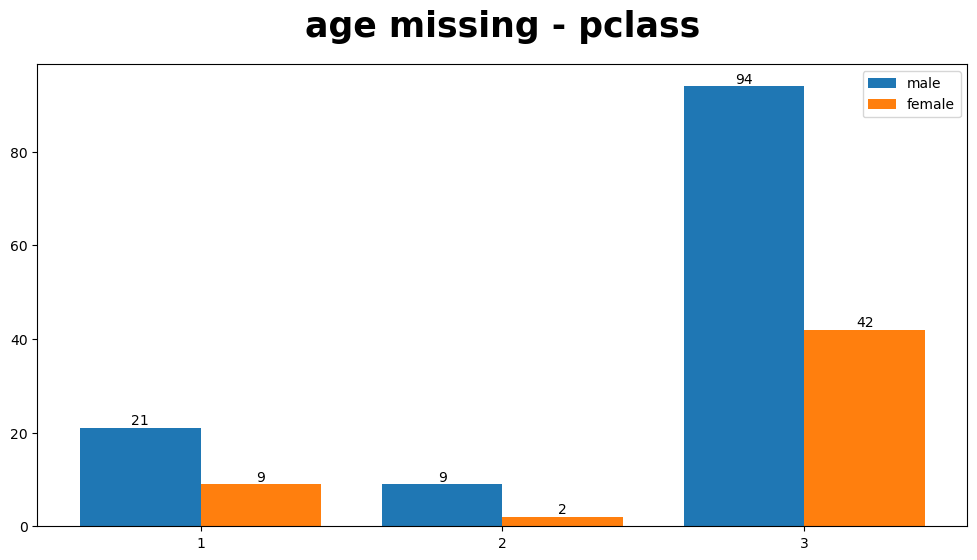

In [203]:

plt.figure(figsize=(12,6))
mis_count1= ttDF.loc[(ttDF['age'].isna()) & (ttDF['sex']=='male'), ['pclass']].value_counts()
mis_count2= ttDF.loc[(ttDF['age'].isna()) & (ttDF['sex']=='female'), ['pclass']].value_counts()
# print(mis_count1.index)

## 멀티 인덱스 구조를 가지고 있어, 리인덱스를 하기 힘들었음.
## 따라서 같은 배열을 가진 것을 
# mis_count1 = mis_count1.reindex(['1','2','3',])
# mis_count2 = mis_count2.reindex(['1','2','3',])
# mis_count2 = mis_count2.reindex([1,2,3,],fill_value=0)


xData = pd.Series([3,1,2])
yData1 = mis_count1.values
yData2 = mis_count2.values
# print(xData.shape, yData1.shape, yData2.shape)
# print(xData.dtype, yData1.dtype, yData2.dtype)

print(mis_count1)
print(mis_count2)

# xx = np.arange(1,4)
width = 0.2
plt.bar(xData-width,yData1, width=0.4, label='male')
plt.bar(xData+width,yData2, width=0.4, label='female')

for i in range(len(xData)):
    plt.text(xData[i]-width, yData1[i], str(yData1[i]), ha='center', va='bottom')
for i in range(len(xData)):
    plt.text(xData[i]+width, yData2[i], str(yData2[i]), ha='center', va='bottom')


plt.title('age missing - pclass',pad=20,  fontdict={'weight':'bold','size':'25'})
plt.legend()
plt.xticks([1,2,3])
plt.show()